In [1]:
import numpy as np, pandas as pd
import os
import subprocess
from scipy.stats import pearsonr
from scipy import signal
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [2]:
file = 'XBI_Tests/Test_CuratedData.csv'
curated_data = pd.read_csv(file)
hit_trials = curated_data[curated_data.outcome == 'ignore']
hit_trials = hit_trials[hit_trials['frame_1']!='0']
print(hit_trials.shape)
t2f = np.array(hit_trials['frame_1'])
t2f2 = []
fold = 'XBI_Tests/20231208_1249_HumanTest_v01_videos/Conv_fold/'
files2filter = []
files = os.listdir(fold)
for i in t2f:
    x = i.split('/')[2].split('.')[0]+'.mp4'
    # print(x)
    if x in files:
        t2f2.append(i)
        files2filter.append(os.path.join(fold, x))
# print(hit_trials['frame_1'])
hit_trials = hit_trials[hit_trials['frame_1'].isin(t2f2)]

(49, 24)


In [3]:
#target_coords = np.array(hit_trials['target_x'])#, np.array(hit_trials['target_y']))

In [4]:
hit_trials = hit_trials.reset_index()
# hit_trials = hit_trials.drop(['index'], axis = 1)
hit_trials

,index,session,date,start,time,experiment,version,animal,frame_1,reward,...,touch_y,touch_time,target_x,target_y,target_time,target_speed,target_size,target_on,datafile,videofile
0,0,0,20231208,1249,2414,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[0.29819143034930207, 0.29819143034930207, 0.2...","[-8.159159714566785, -8.159159714566785, -8.15...","[6612590253, 6613855871, 6613872567, 661388916...",7,5,6613856282,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124140_trial_4.h264
1,1,0,20231208,1249,2414,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[2.580254895782439, 12.089297651420033, 12.089...","[3.1441338703210975, -2.977228714155361, -2.97...","[6621638883, 6621639706, 6621655883, 662167204...",7,5,6622939279,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124149_trial_5.h264
2,2,0,20231208,1249,2420,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[10.992433275769574, 4.877032367456607, 4.8770...","[-7.8758632938824595, 2.7111968075383857, 2.71...","[6632354802, 6632355803, 6632371886, 663238806...",7,5,6633638800,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124200_trial_6.h264
3,3,0,20231208,1249,2420,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[4.53031301009083, 8.427926610397577, 8.427926...","[6.108324795754015, -7.917431180832434, -7.917...","[6641854164, 6641854678, 6641871013, 664188789...",7,5,6643154810,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124209_trial_7.h264
4,4,0,20231208,1249,2421,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[4.852064811861638, -6.96204725060831, -6.9620...","[-0.2994751416229212, 0.9404738520991103, 0.94...","[6651053610, 6651054499, 6651071021, 665108696...",7,5,6652354111,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124218_trial_8.h264
5,5,0,20231208,1249,2422,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[-9.812575193614915, 5.524484126646488, 5.5244...","[7.448287180476849, 2.680117630529015, 2.68011...","[6660053377, 6660054170, 6660069933, 666008691...",7,5,6661337109,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124227_trial_9.h264
6,6,0,20231208,1249,2423,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[-5.554898489453047, 7.264964450689639, 7.2649...","[-4.686151108227466, -1.77372877123259, -1.773...","[6669235870, 6669236966, 6669252836, 666926917...",7,5,6670536629,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124236_trial_10.h264
7,7,0,20231208,1249,2424,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[-7.937494580397706, -9.51336923309209, -9.513...","[-6.883309172579134, 2.45599990584768, 2.45599...","[6679935199, 6679936297, 6679952069, 667996888...",7,5,6681219221,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124247_trial_11.h264
8,8,0,20231208,1249,2425,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[0.4667489515790956, -8.046361204678178, -8.04...","[-5.582728189689638, -0.2825528899759622, -0.2...","[6688918151, 6688918883, 6688935030, 668895133...",7,5,6690202275,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124256_trial_12.h264
9,9,0,20231208,1249,2430,HumanTest,v01,0,XBI_Tests/20231208_1249_HumanTest_v01_videos/G...,[],...,[],[],"[7.614010089358993, -5.670385979456609, -5.670...","[-2.9384810266510164, 7.843372278931332, 7.843...","[6697884391, 6697884860, 6697900824, 669791751...",7,5,6699201619,20231208_1249_HumanTest_v01_anc.mwk2,GazeXBI_20231208124305_trial_13.h264


In [5]:
targ_cords = []
# sample_rates = []
# tr_dur = (hit_trials.trial_end-hit_trials.trial_start)/1000000
for i in range(hit_trials.shape[0]):
    x_cord_s = hit_trials.loc[i]['target_x'].split('[')[1].split(']')[0].split(', ')
    y_cord_s = hit_trials.loc[i]['target_y'].split('[')[1].split(']')[0].split(', ')
    x_cord = [float(i) for i in x_cord_s]
    y_cord = [float(i) for i in y_cord_s]
    targ_cord = [list(a) for a in zip(x_cord, y_cord)]
    spl = hit_trials.loc[i]['frame_1'].split('/')
    fl = spl[2].split('.')[0] + 'DLC_resnet101_HumanIRMar4shuffle2_100000_filtered.csv'
    feat_file = os.path.join(os.getcwd(), spl[0], spl[1], 'Human_test_vids', fl)
    targ_cords.append([feat_file, targ_cord])
    # sample_rate = len(targ_cord)/tr_dur[i]
    # sample_rates.append(sample_rate)



In [6]:
# path = sorted(path)
# with open(r'files_to_filter.txt', 'w') as fp:
#     for item in files2filter:
#         # write each item on a new line
#         fp.write(f"\n file '{os.path.join(os.getcwd(), item)}'")
#     print('Done')

In [7]:
# input_file = '/home/yashas/Documents/dlc_projects/XBI_Tests/files_to_filter.txt'
# output_file = '/home/yashas/Documents/dlc_projects/XBI_Tests/combined_vids_filtered.mp4'

# command = f"ffmpeg -f concat -safe 0 -i {input_file} -c copy {output_file}"
# subprocess.call(command, shell=True)

In [8]:
def comb_arr(df):
    poi_filt_x = np.array(df.drop('y', level = 1, axis = 1)).T
    poi_filt_y = np.array(df.drop('x', level = 1, axis = 1)).T

    poi_array1 = np.stack((poi_filt_x, poi_filt_y), axis=-1)
    return poi_array1

In [9]:
# poi_filt_right

In [10]:
poi_list = []

for i in targ_cords:
    f_points = pd.read_csv(i[0], header=[1,2], index_col=[0])
    poi = f_points.drop(['RightBrow_out', 'RightBrow_in', 'LeftBrow_in', 'LeftBrow_out', 'RightEye_Outer', 'RightEye_Inner', 'LeftEye_Outer', 'LeftEye_Inner', 'RightPupil_Reflection', 'LeftPupil_Reflection'], level = 0, axis = 1)#.drop('likelihood',level = 1, axis=1)#
    filt = poi.drop(['x', 'y'], level = 1, axis = 1)
    filt = filt[(filt>0.9).all(axis = 1)]
    poi_filt = poi.drop('likelihood',level = 1, axis=1)#[poi.index.isin(filt.index)]

    poi_filt_left = poi_filt.drop(['RightPupil_Outer', 'RightPupil_Top', 'RightPupil_Inner', 'RightPupil_Bottom'], level = 0, axis = 1)
    poi_filt_right = poi_filt.drop(['LeftPupil_Inner', 'LeftPupil_Top', 'LeftPupil_Outer', 'LeftPupil_Bottom'], level = 0, axis = 1)

    poi_array_left = comb_arr(poi_filt_left)
    poi_array_right = comb_arr(poi_filt_right)
    # poi_filt_x = np.array(poi_filt.drop('y', level = 1, axis = 1)).T
    # poi_filt_y = np.array(poi_filt.drop('x', level = 1, axis = 1)).T

    # poi_array1 = np.stack((poi_filt_x, poi_filt_y), axis=-1)
    set2 = np.reshape(np.array(i[1]), (1, np.array(i[1]).shape[0], np.array(i[1]).shape[1]))
    
    poi_list.append([i[0], set2, poi_array_left, poi_array_right])
    

In [11]:
poi_array_left.shape

(4, 150, 2)

In [12]:
def padding(arr, len2pad):
    # 3d padding for 2nd [1] axis
    if len2pad==0:
        return arr
    x = np.pad(arr, (0, len2pad), 'constant', constant_values=(0,0))
    j = np.delete(x, np.s_[-len2pad::], axis = 0)
    k = np.delete(j, np.s_[-len2pad::], axis = 2)
    return k

In [13]:
def corr2_coeff(A, B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]

    # Sum of squares across rows
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)

    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA[:, None],ssB[None]))

In [14]:
corr_vals = []
corr_vals2d = []
for i in range(len(poi_list)):
    # s2 = np.reshape(poi_list[i][1], (1, poi_list[i][1].shape[0], 2))
    # s1 = np.reshape(poi_list[i][2], (poi_list[i][2].shape[1], poi_list[i][2].shape[0], 2))
    fl = poi_list[i][0]
    data_set1 = poi_list[i][1]
    data_set2 = poi_list[i][2]
    data_set3 = poi_list[i][3]

    print(data_set1.shape)
    print(data_set2.shape)
    print(data_set3.shape)
    
    max_time_steps = max(data_set1.shape[1], data_set2.shape[1])

    # Pad the datasets along the time axis
    padded_data_set1 = padding(data_set1, (max_time_steps - data_set1.shape[1]))
    padded_data_set2 = padding(data_set2, (max_time_steps - data_set2.shape[1]))
    padded_data_set3 = padding(data_set3, (max_time_steps - data_set3.shape[1]))

    s1 = np.reshape(padded_data_set1, (padded_data_set1.shape[1], padded_data_set1.shape[2]))
    # s1 = padded_data_set1
    s2 = padded_data_set2
    s3 = padded_data_set3
    
    print(s1.shape)
    print(s2.shape)
    print(s3.shape)

    # c_l = signal.correlate(s1, s2, mode='full', method='auto')
    # print(c_l.shape)
    # c_r = signal.correlate(s1, s3, mode='full', method='auto')
    # print(c_r.shape)
    # print()
    # c_l = []
    # for i in s2:
    #     c_l.append([pearsonr(s1.flatten(), i.flatten())[0], pearsonr(s1.flatten(), i.flatten())[1]])
    # c_l = np.array(c_l)

    # c_r = []
    # for i in s3:
    #     c_r.append([pearsonr(s1.flatten(), i.flatten())[0], pearsonr(s1.flatten(), i.flatten())[1]])
    # c_r = np.array(c_r)

    c_l = []
    for i in s2:
        c_l.append(signal.correlate(s1, i, mode='full', method='auto'))
    c_l = np.array(c_l)

    c_r = []
    for i in s3:
        c_r.append(signal.correlate(s1, i, mode='full', method='auto'))
    c_r = np.array(c_r)

    c_l2 = []
    for i in s2:
        c_l2.append(signal.correlate2d(s1, i, mode='full'))
    c_l2 = np.array(c_l2)

    c_r2 = []
    for i in s3:
        c_r2.append(signal.correlate2d(s1, i, mode='full'))
    c_r2 = np.array(c_r2)

    # c_l = np.array([corr2_coeff(s1.reshape(1,-1), i.reshape(1,-1)) for i in s2])
    # c_r = np.array([corr2_coeff(s1.reshape(1,-1), i.reshape(1,-1)) for i in s3])

    print(c_l.shape)
    print(c_r.shape)
    # print(c_l)
    # print(c_r)
    print()

    corr_vals.append([fl, c_l, c_r])
    corr_vals2d.append([fl, c_l2, c_r2])

(1, 304, 2)
(4, 149, 2)
(4, 149, 2)
(304, 2)
(4, 304, 2)
(4, 304, 2)
(4, 607, 3)
(4, 607, 3)

(1, 382, 2)
(4, 150, 2)
(4, 150, 2)
(382, 2)
(4, 382, 2)
(4, 382, 2)
(4, 763, 3)
(4, 763, 3)

(1, 381, 2)
(4, 149, 2)
(4, 149, 2)
(381, 2)
(4, 381, 2)
(4, 381, 2)
(4, 761, 3)
(4, 761, 3)

(1, 382, 2)
(4, 149, 2)
(4, 149, 2)
(382, 2)
(4, 382, 2)
(4, 382, 2)
(4, 763, 3)
(4, 763, 3)

(1, 382, 2)
(4, 150, 2)
(4, 150, 2)
(382, 2)
(4, 382, 2)
(4, 382, 2)
(4, 763, 3)
(4, 763, 3)

(1, 381, 2)
(4, 149, 2)
(4, 149, 2)
(381, 2)
(4, 381, 2)
(4, 381, 2)
(4, 761, 3)
(4, 761, 3)

(1, 382, 2)
(4, 149, 2)
(4, 149, 2)
(382, 2)
(4, 382, 2)
(4, 382, 2)
(4, 763, 3)
(4, 763, 3)

(1, 381, 2)
(4, 150, 2)
(4, 150, 2)
(381, 2)
(4, 381, 2)
(4, 381, 2)
(4, 761, 3)
(4, 761, 3)

(1, 381, 2)
(4, 149, 2)
(4, 149, 2)
(381, 2)
(4, 381, 2)
(4, 381, 2)
(4, 761, 3)
(4, 761, 3)

(1, 383, 2)
(4, 150, 2)
(4, 150, 2)
(383, 2)
(4, 383, 2)
(4, 383, 2)
(4, 765, 3)
(4, 765, 3)

(1, 383, 2)
(4, 150, 2)
(4, 150, 2)
(383, 2)
(4, 383, 2)
(4,

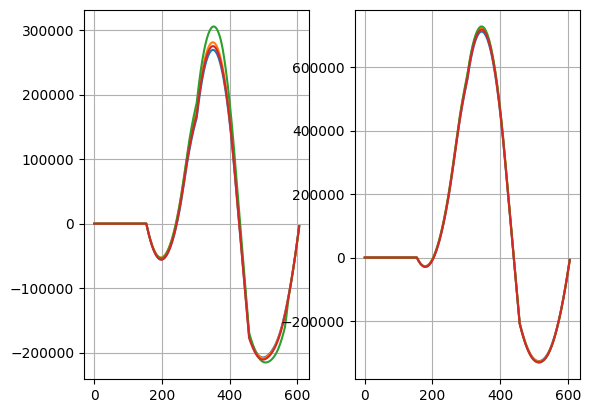

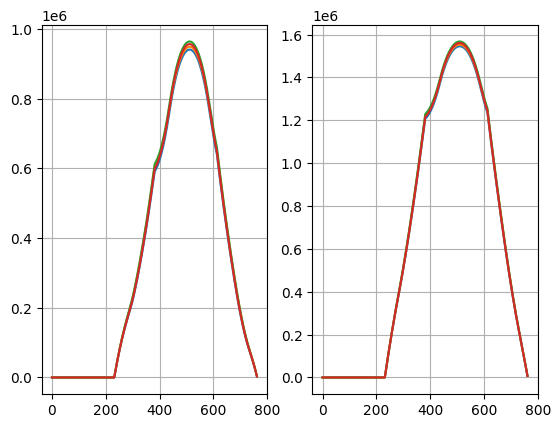

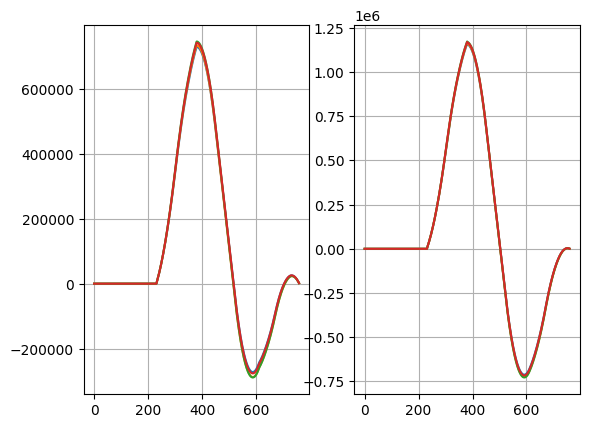

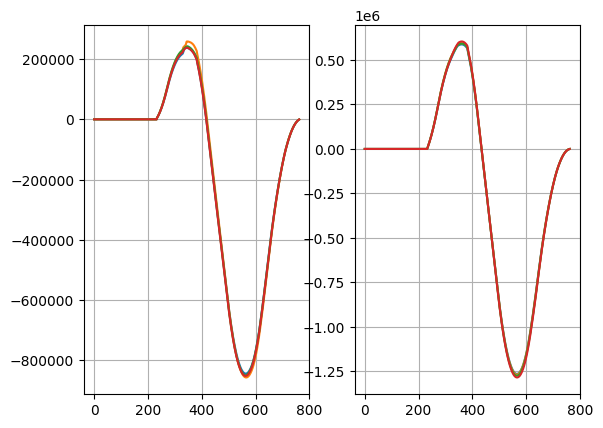

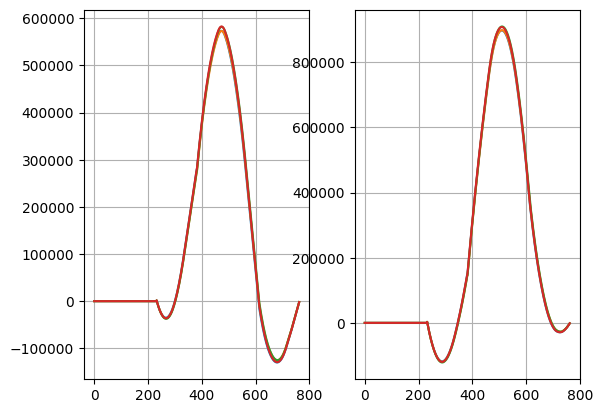

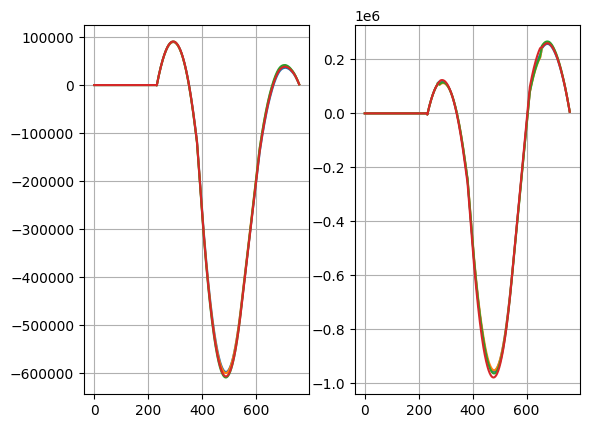

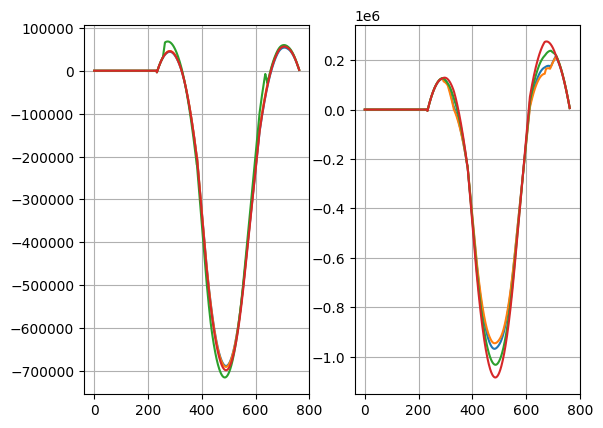

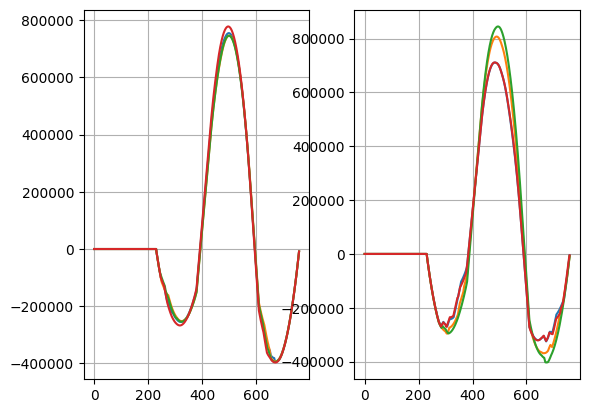

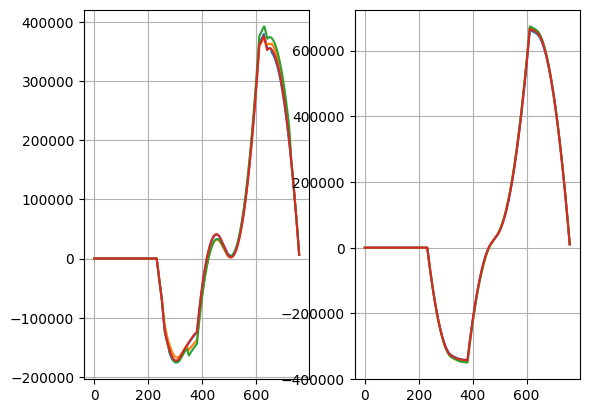

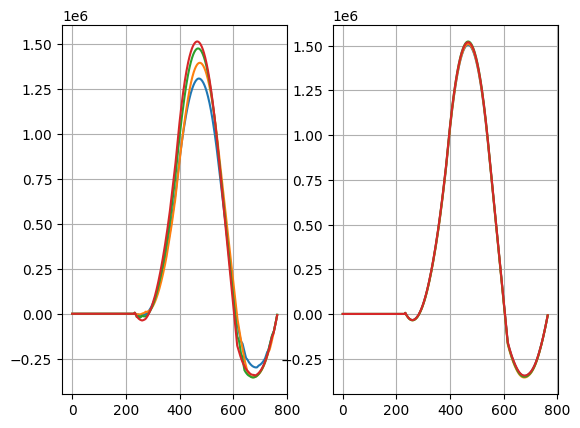

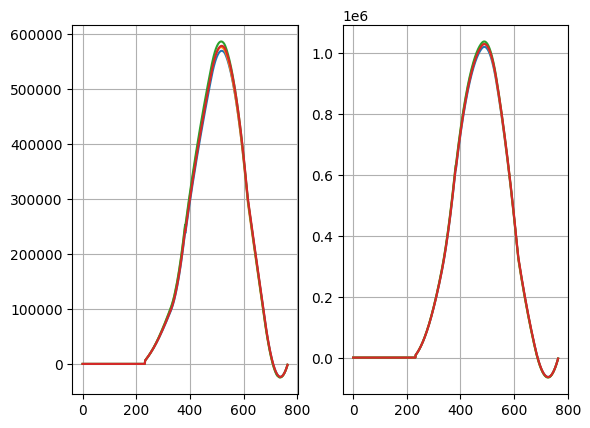

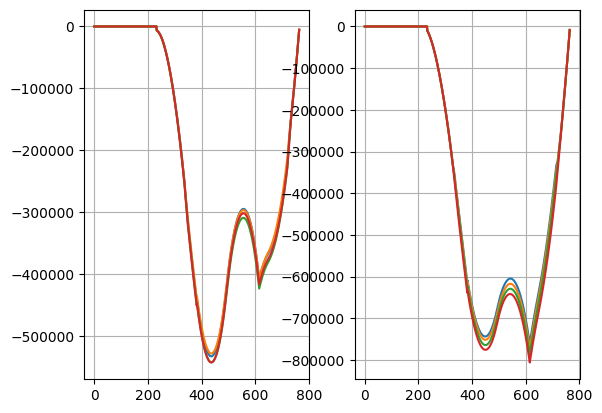

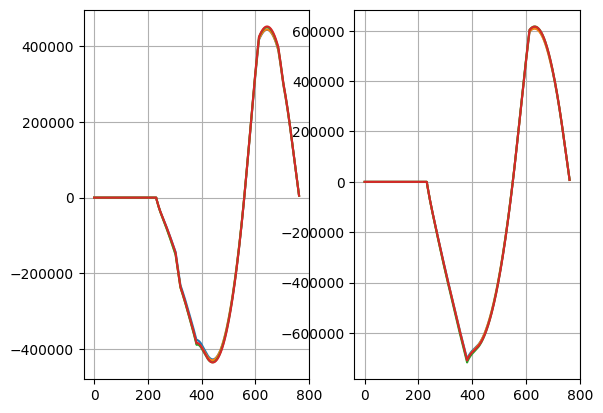

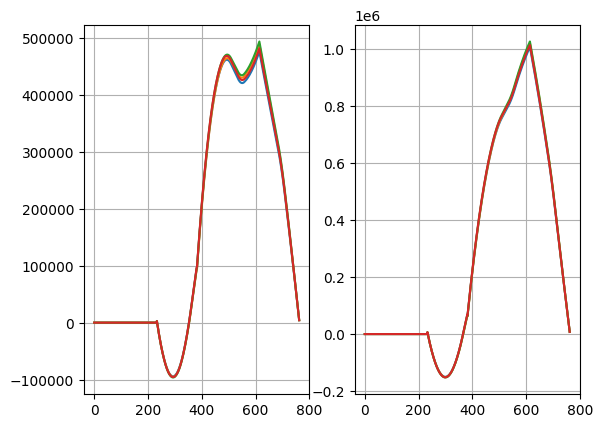

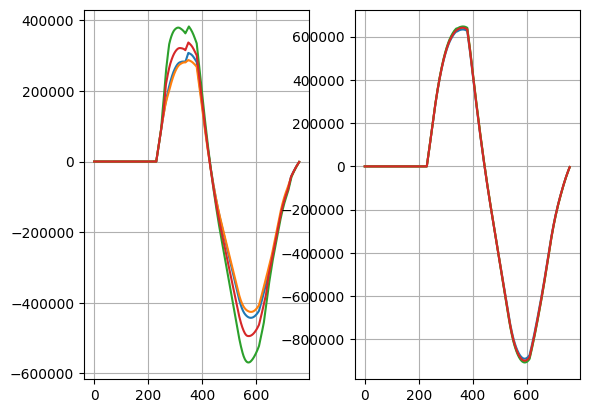

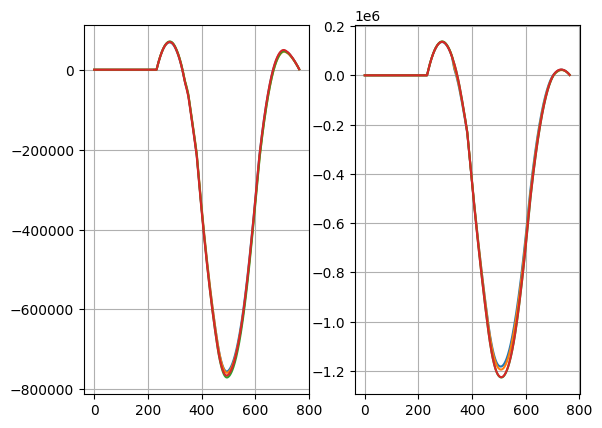

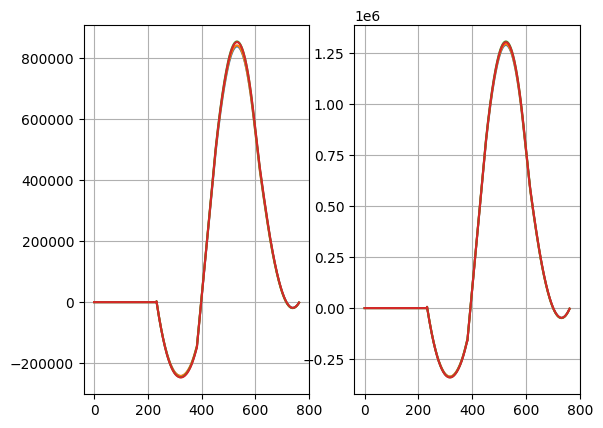

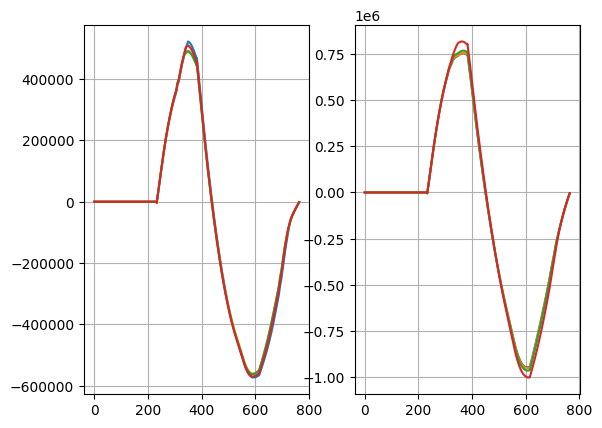

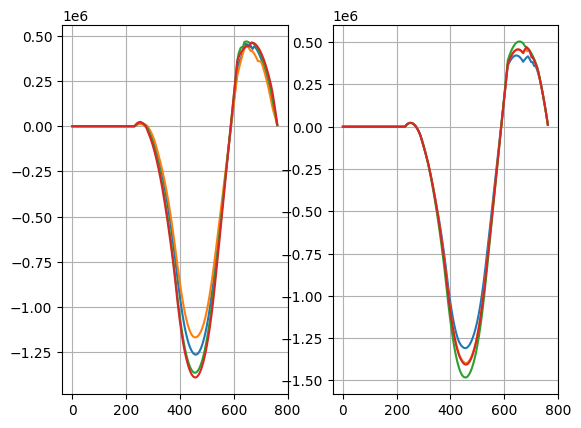

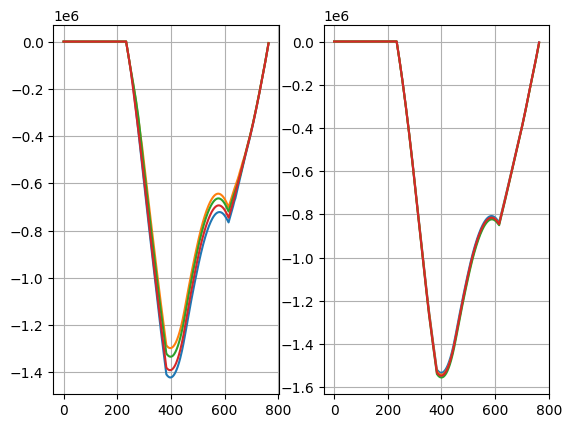

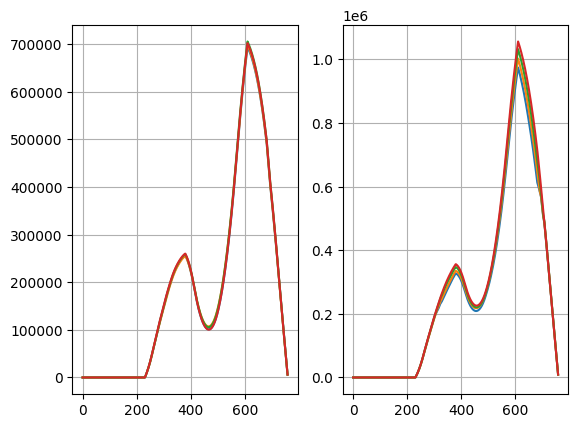

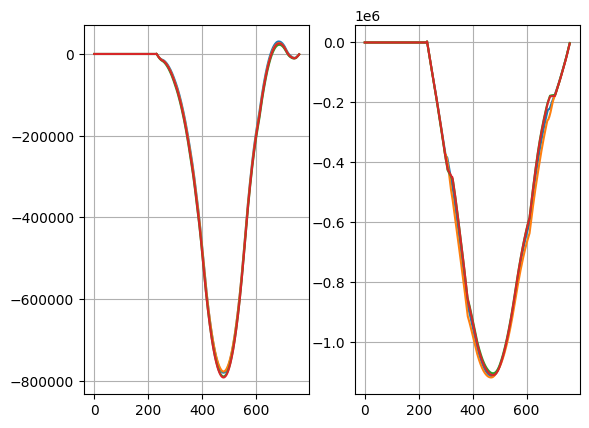

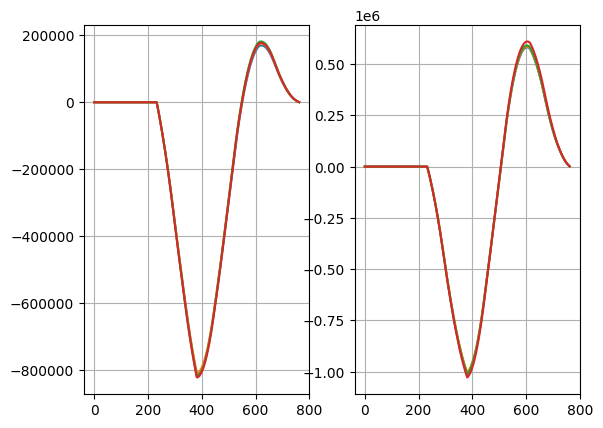

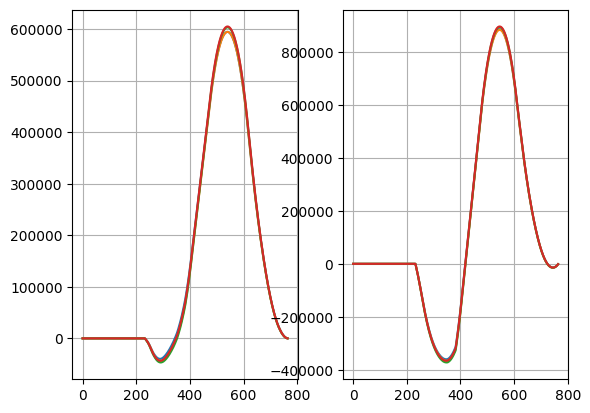

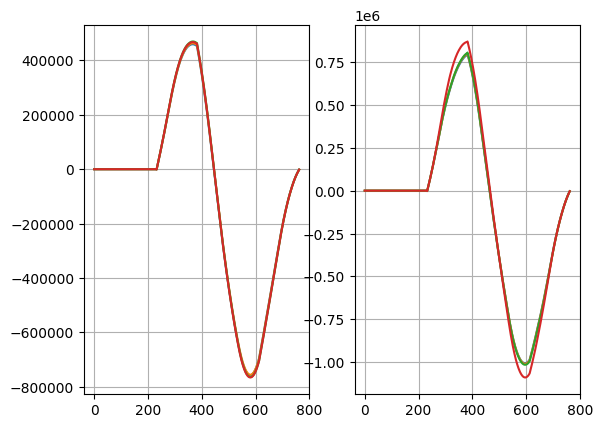

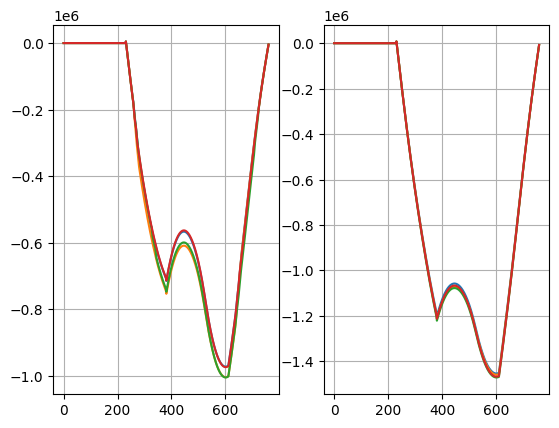

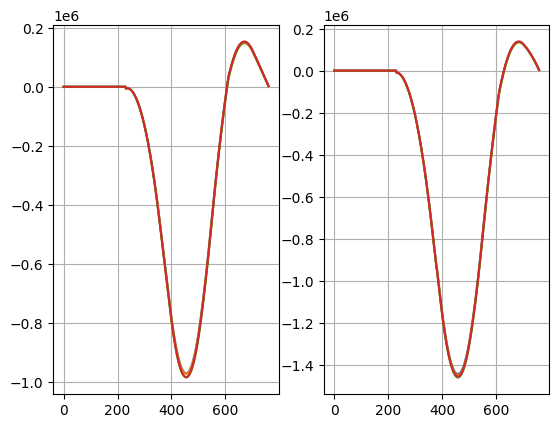

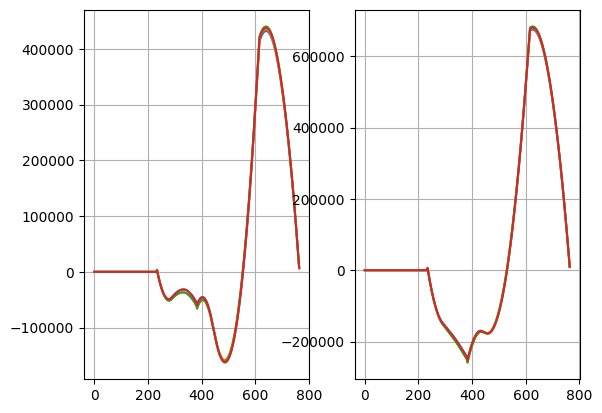

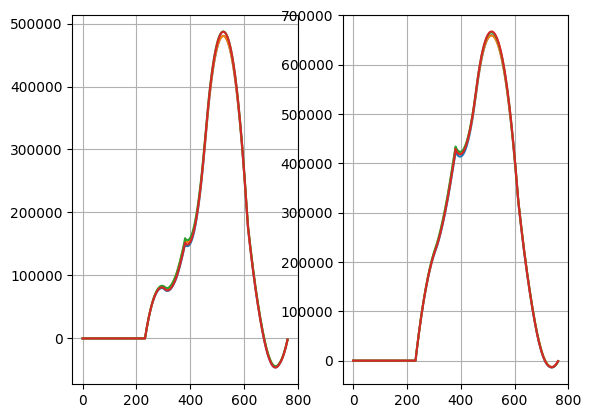

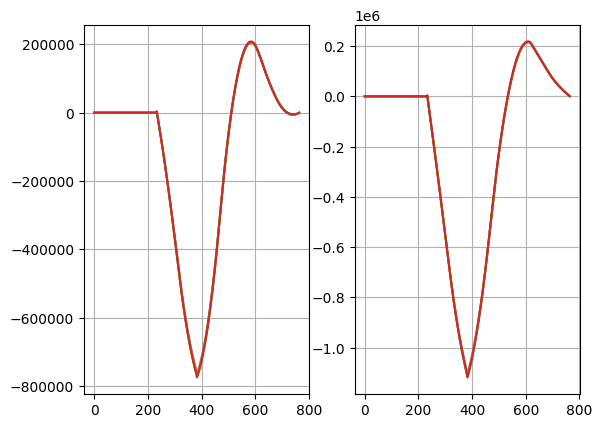

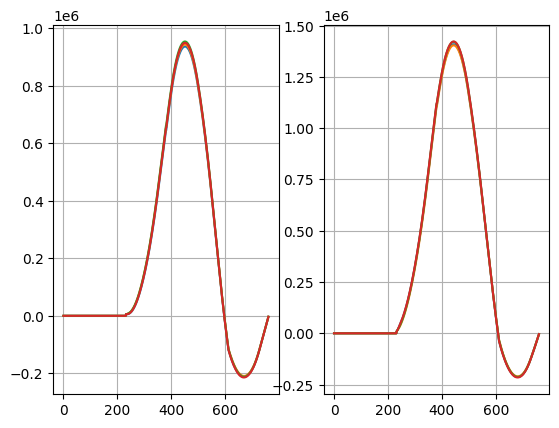

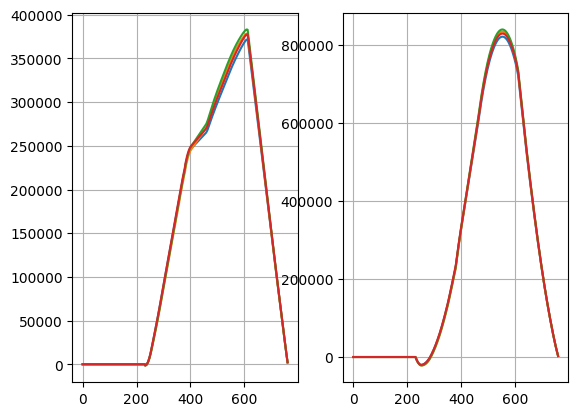

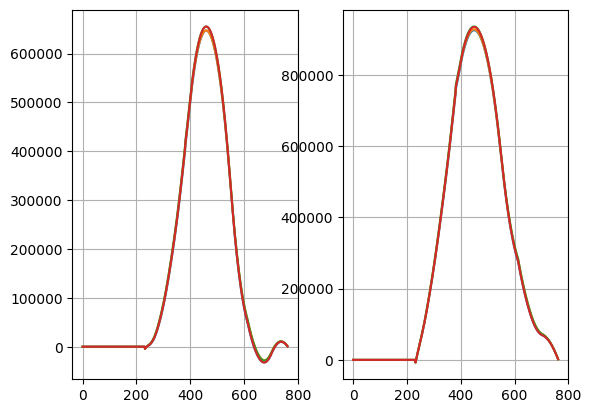

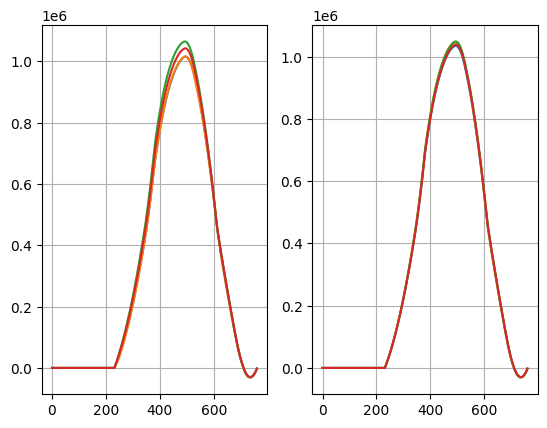

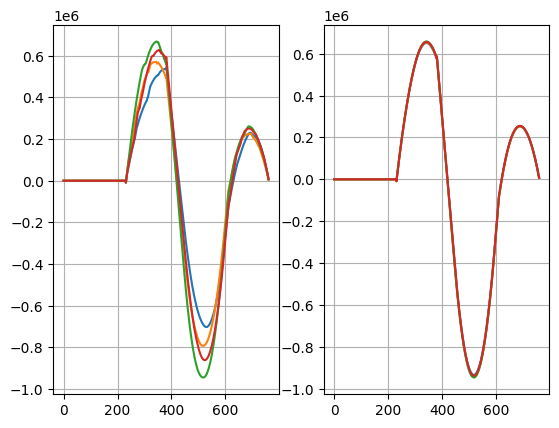

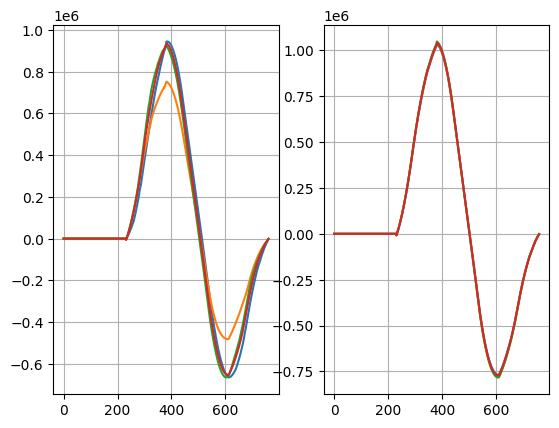

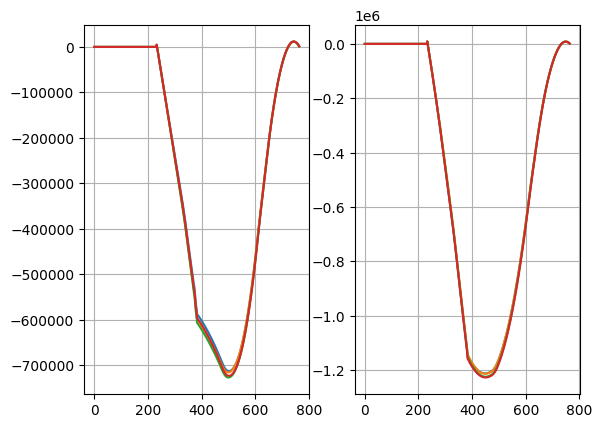

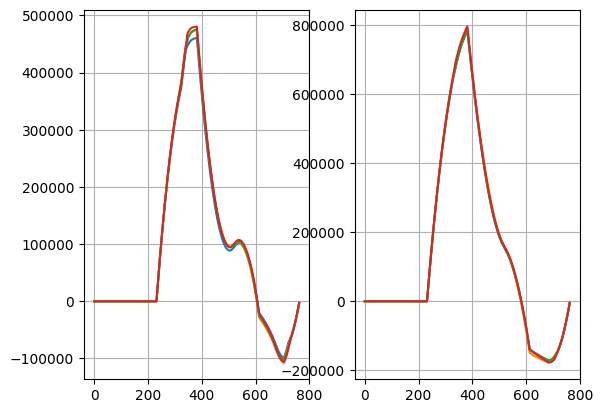

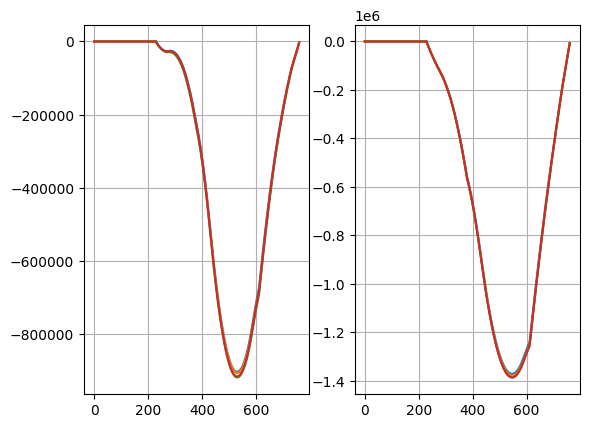

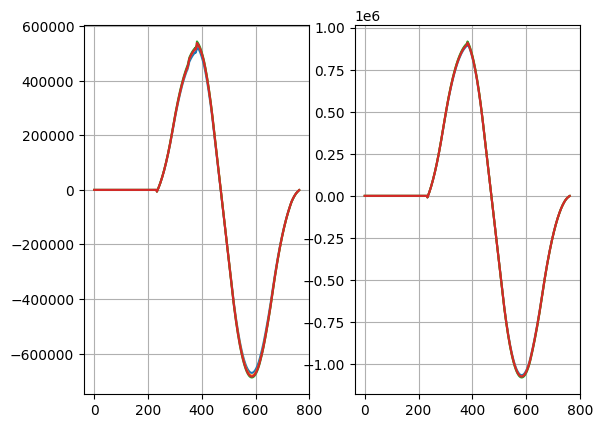

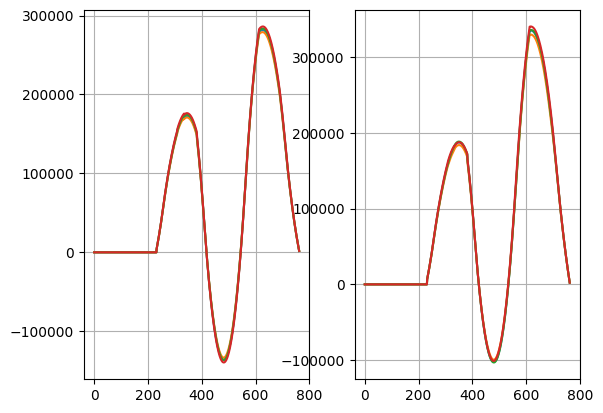

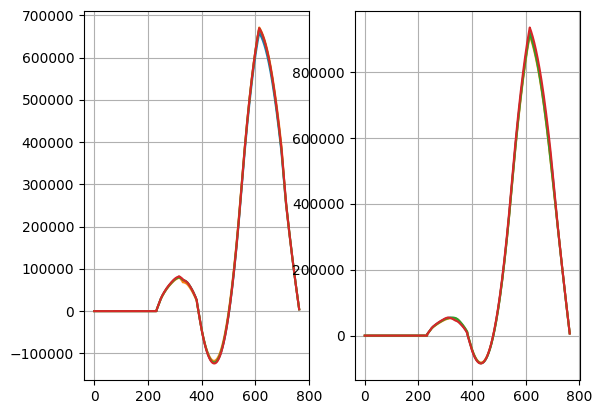

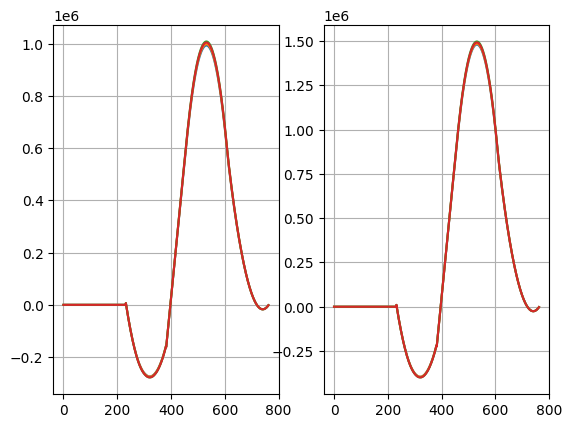

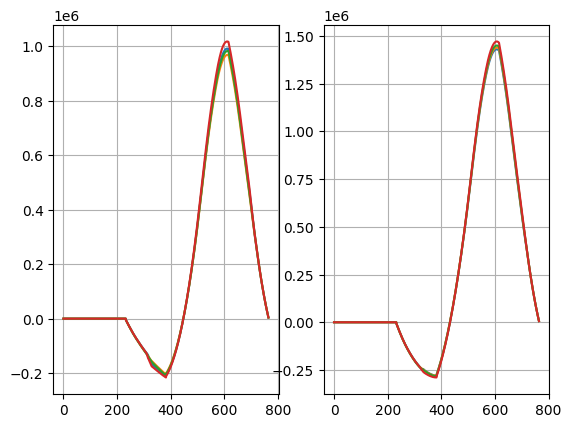

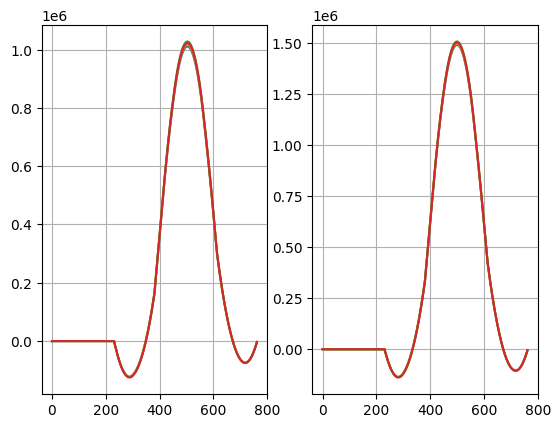

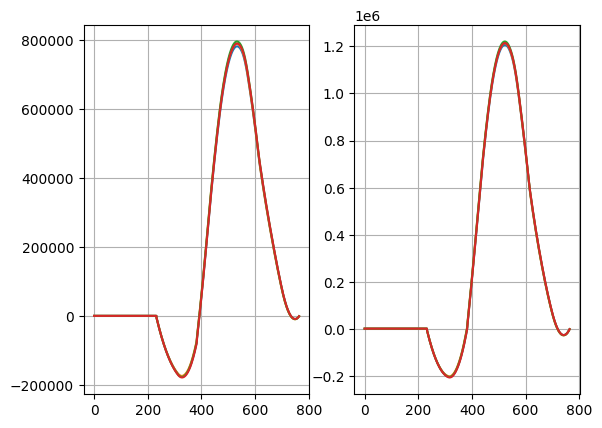

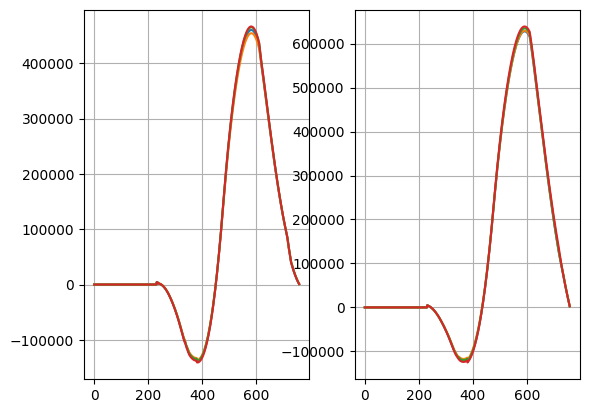

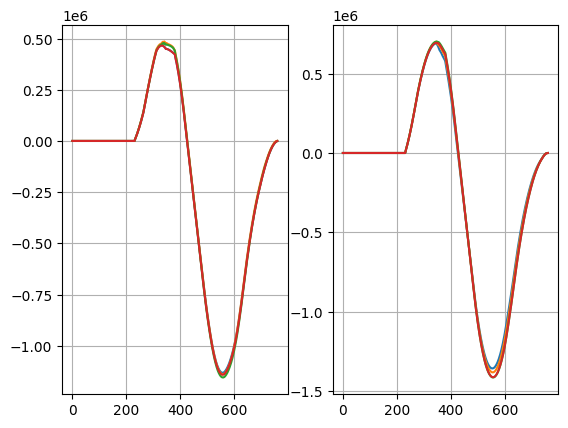

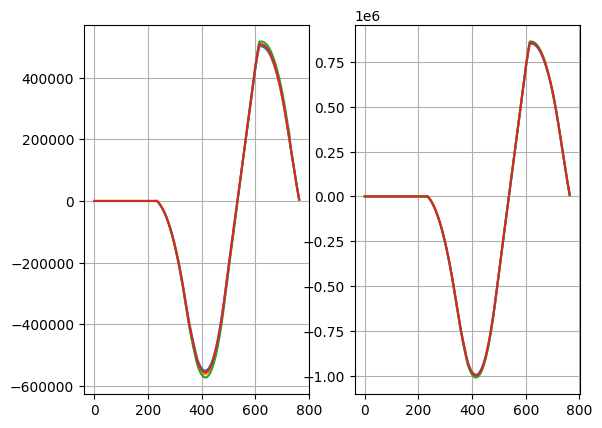

In [18]:
for i in range(len(corr_vals)):
    cur_corr = corr_vals[i]
    corr = cur_corr[2][:,:,1].T
    corl = cur_corr[1][:,:,1].T
    
    fig, (ax, ax2) = plt.subplots(1, 2)
    ax.plot(corr)
    ax.grid()
    ax2.plot(corl)
    ax2.grid()
    #fig.savefig("{}_right2.png".format(cur_corr[0]))
    plt.show()

In [26]:
corr_vals[0]

['/home/yashas/Documents/dlc_projects/XBI_Tests/20231208_1249_HumanTest_v01_videos/Human_test_vids/GazeXBI_20231208124140_trial_4DLC_resnet101_HumanIRMar4shuffle2_100000_filtered.csv',
 array([[[-3.97364299e-11,  2.72449114e-11, -8.28759132e-11],
         [ 6.35782878e-11, -5.93193500e-11, -4.25893772e-12],
         [ 7.94728597e-12,  8.23053238e-11, -1.37936326e-10],
         ...,
         [-8.26695834e+03, -2.14018370e+04, -2.00614507e+03],
         [-5.53553663e+03, -1.43460259e+04, -1.31904691e+03],
         [-2.77841247e+03, -7.21195795e+03, -6.50332258e+02]],
 
        [[ 2.38418579e-11,  4.31394834e-11, -6.69813413e-11],
         [-7.94728597e-12,  3.51921974e-11, -7.49286273e-11],
         [ 5.56310018e-11, -2.85294730e-13, -5.53457071e-11],
         ...,
         [-8.10748881e+03, -2.15702828e+04, -2.02406276e+03],
         [-5.42975120e+03, -1.44593520e+04, -1.33082785e+03],
         [-2.72880394e+03, -7.26940886e+03, -6.56140637e+02]],
 
        [[ 4.76837158e-11,  8.6278966

In [ ]:
def generate_correlation_map(x, y):
    """Correlate each n with each m.

    Parameters
    ----------
    x : np.array
      Shape N X T.

    y : np.array
      Shape M X T.

    Returns
    -------
    np.array
      N X M array in which each element is a correlation coefficient.

    """
    mu_x = x.mean(1)
    mu_y = y.mean(1)
    n = x.shape[1]
    if n != y.shape[1]:
        raise ValueError('x and y must ' +
                         'have the same number of timepoints.')
    s_x = x.std(1, ddof=n - 1)
    s_y = y.std(1, ddof=n - 1)
    cov = np.dot(x,
                 y.T) - n * np.dot(mu_x[:, np.newaxis],
                                  mu_y[np.newaxis, :])
    return cov / np.dot(s_x[:, np.newaxis], s_y[np.newaxis, :])

In [ ]:

def test_generate_correlation_map():
    x = np.random.rand(10, 10)
    y = np.random.rand(20, 10)
    desired = np.empty((10, 20))
    for n in range(x.shape[0]):
        for m in range(y.shape[0]):
            desired[n, m] = pearsonr(x[n, :], y[m, :])[0]
    actual = generate_correlation_map(x, y)
    np.testing.assert_array_almost_equal(actual, desired)